In [1]:
#Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
#Loading Dataset

data = pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA  & Visualization

In [3]:
data.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [4]:
data.shape

(400, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


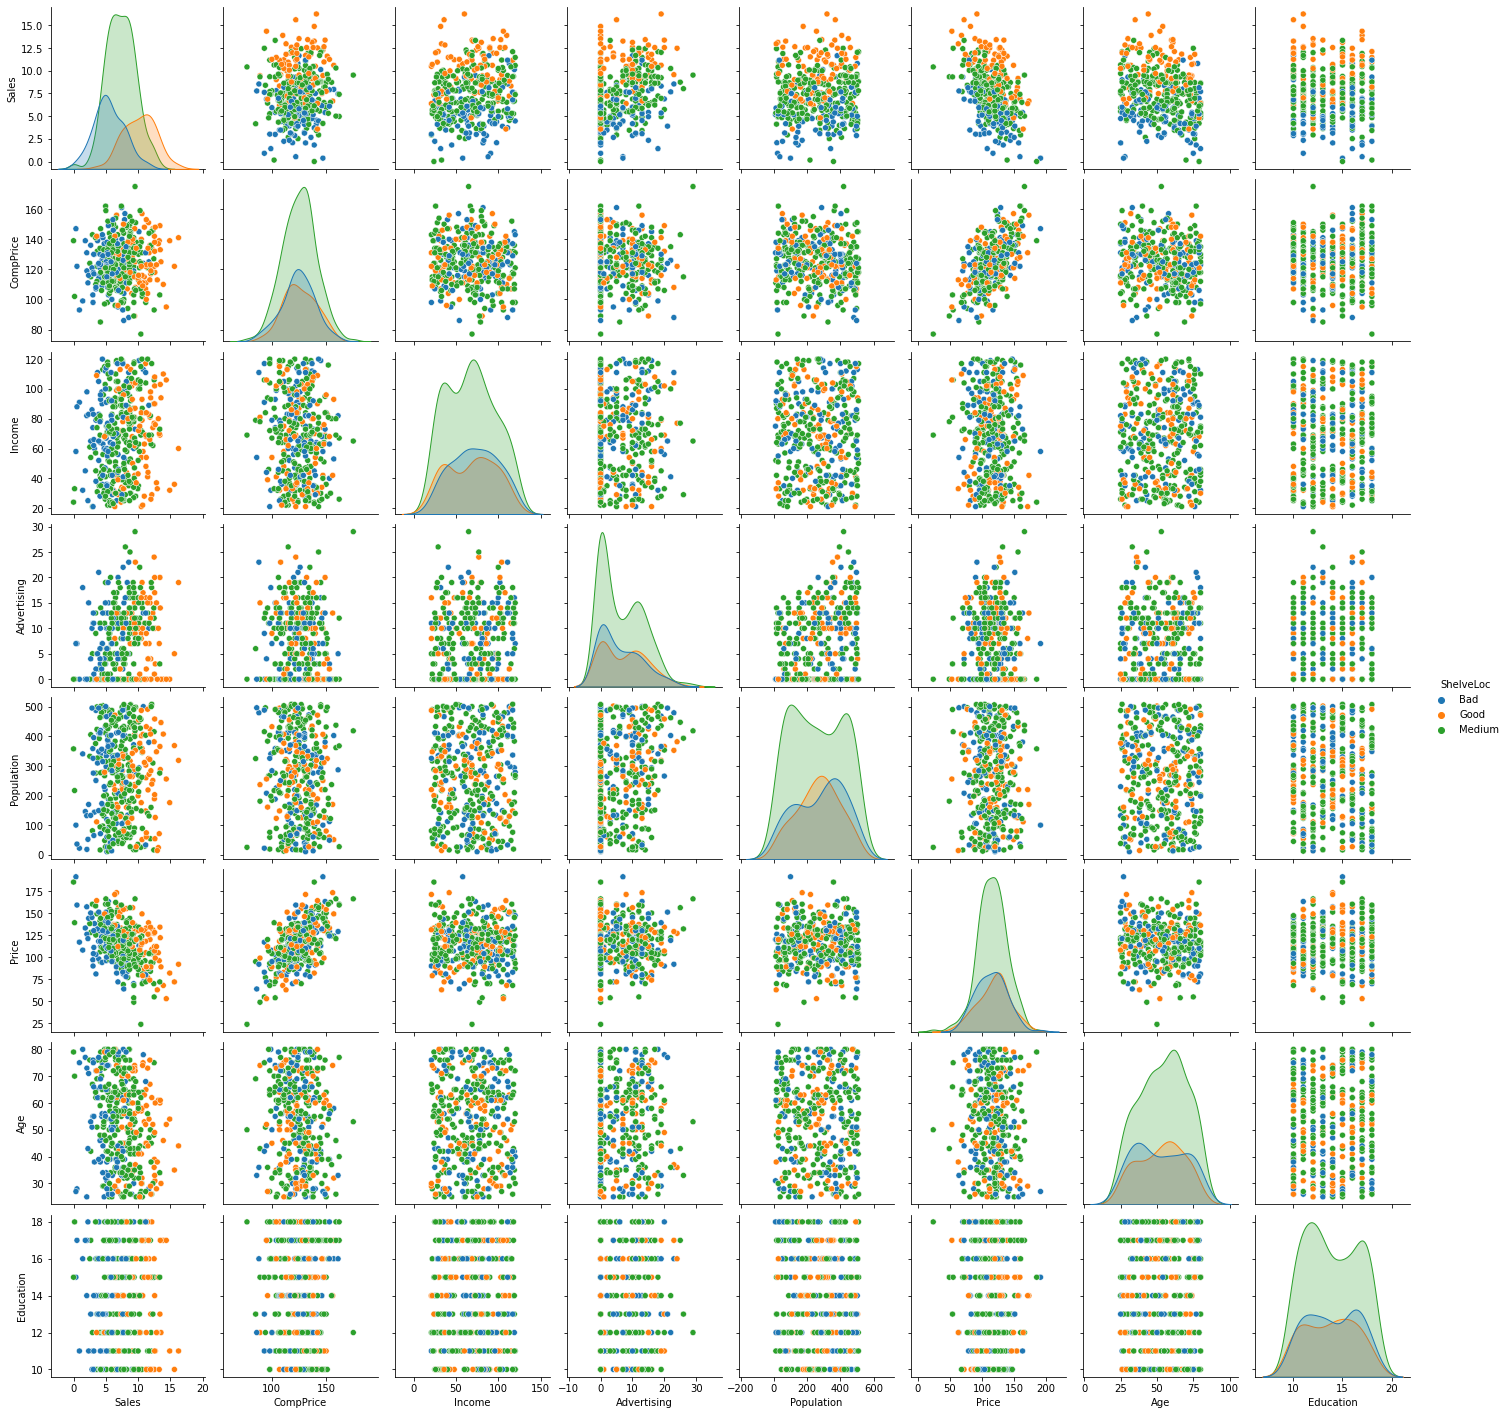

In [7]:
sns.pairplot(data,hue = 'ShelveLoc')

In [8]:
data=pd.get_dummies(data,columns=['Urban','US'],drop_first=True)
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [9]:
data['ShelveLoc']=data['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [10]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,3,50,12,1,1


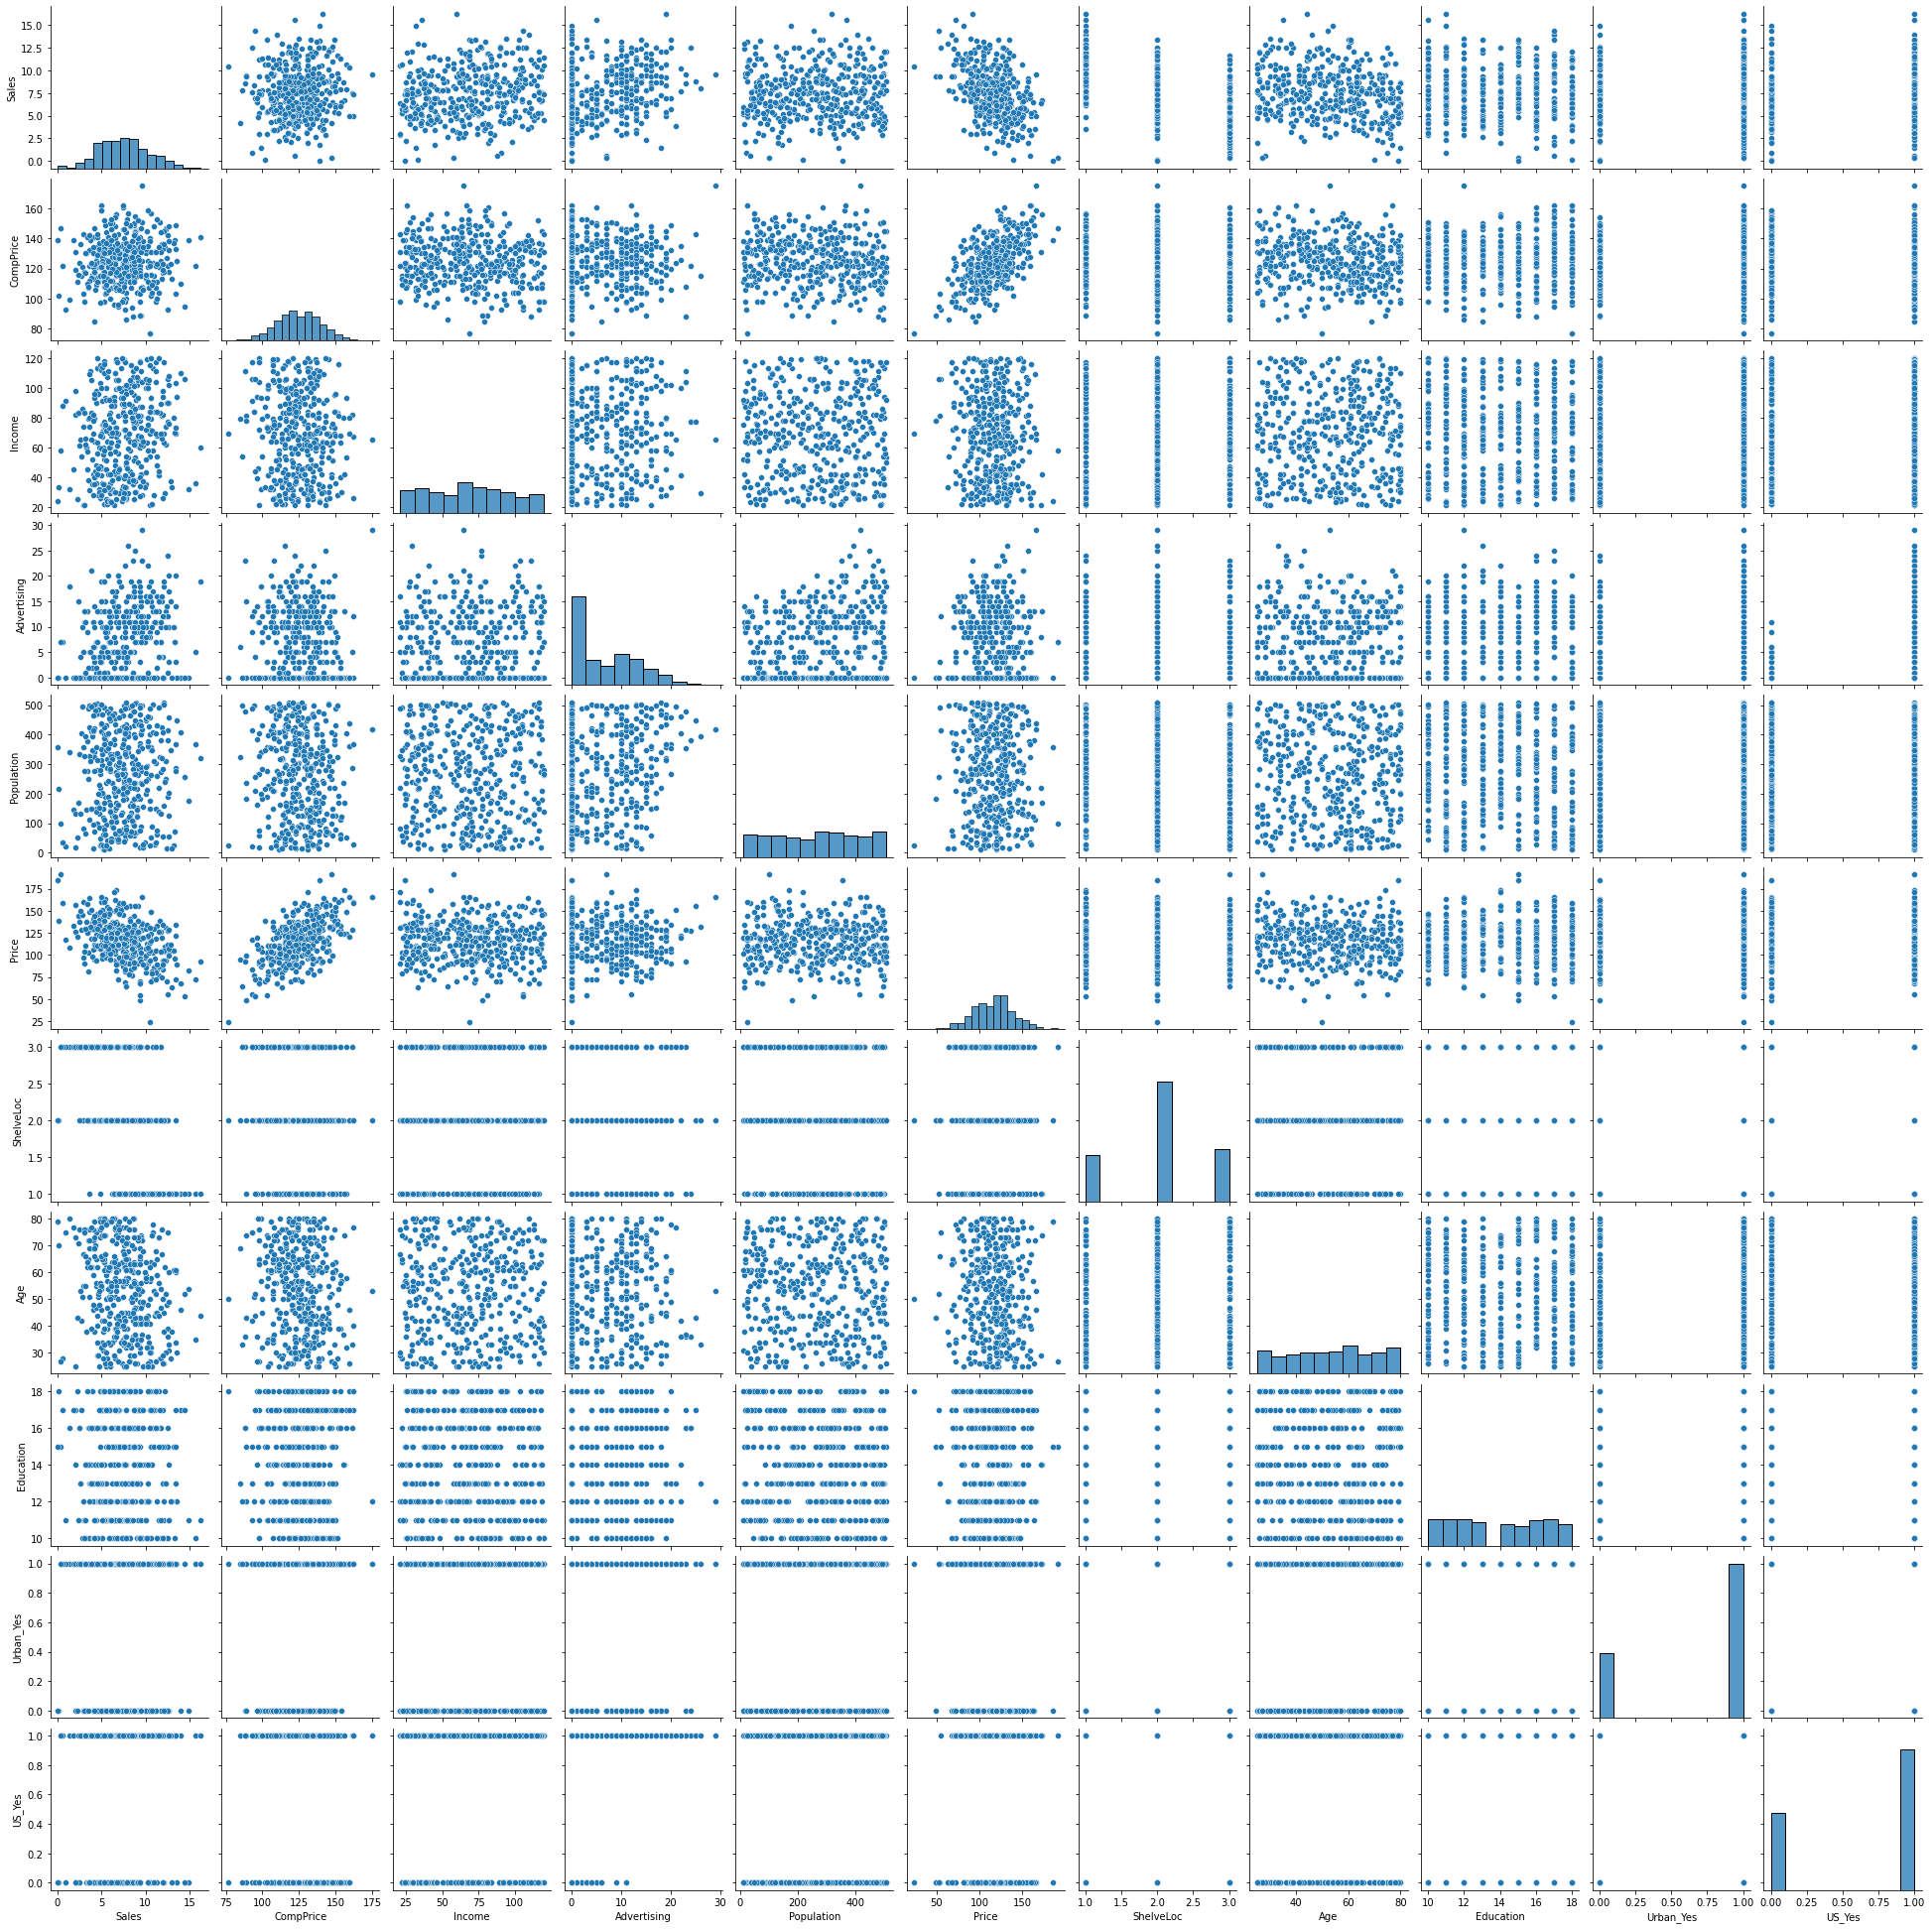

In [11]:
sns.pairplot(data)

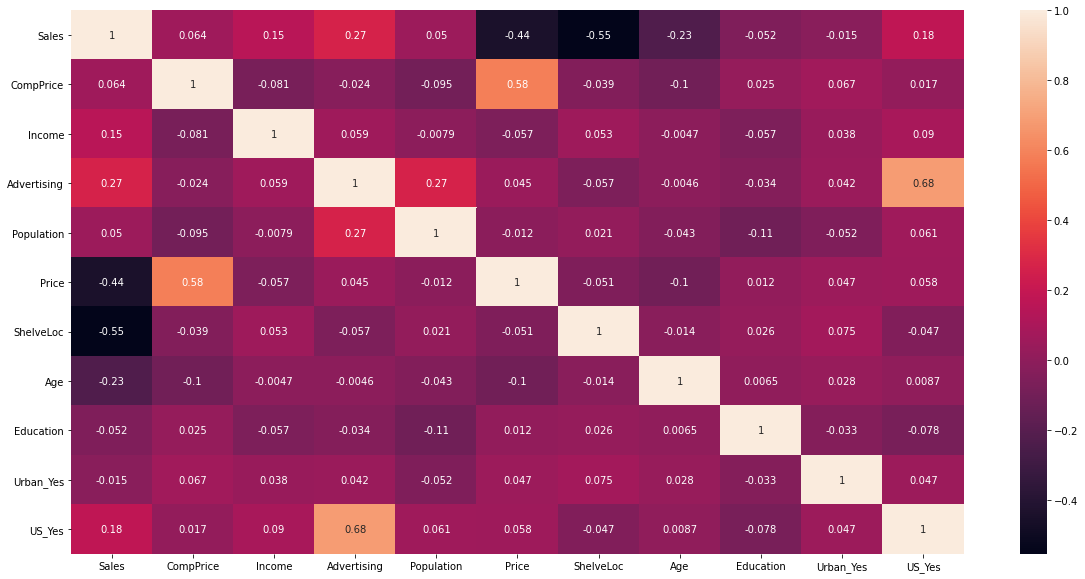

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [13]:
x=data.iloc[:,0:6]
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [14]:
y=data['ShelveLoc']
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [15]:
colnames = list(data.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [16]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

# Decision tree 
ENTROPY CRITERIA

In [17]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

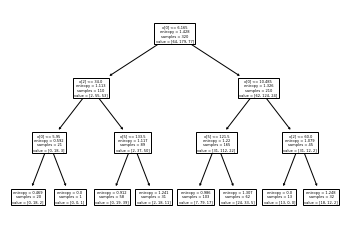

In [18]:
tree.plot_tree(model);
plt.show()

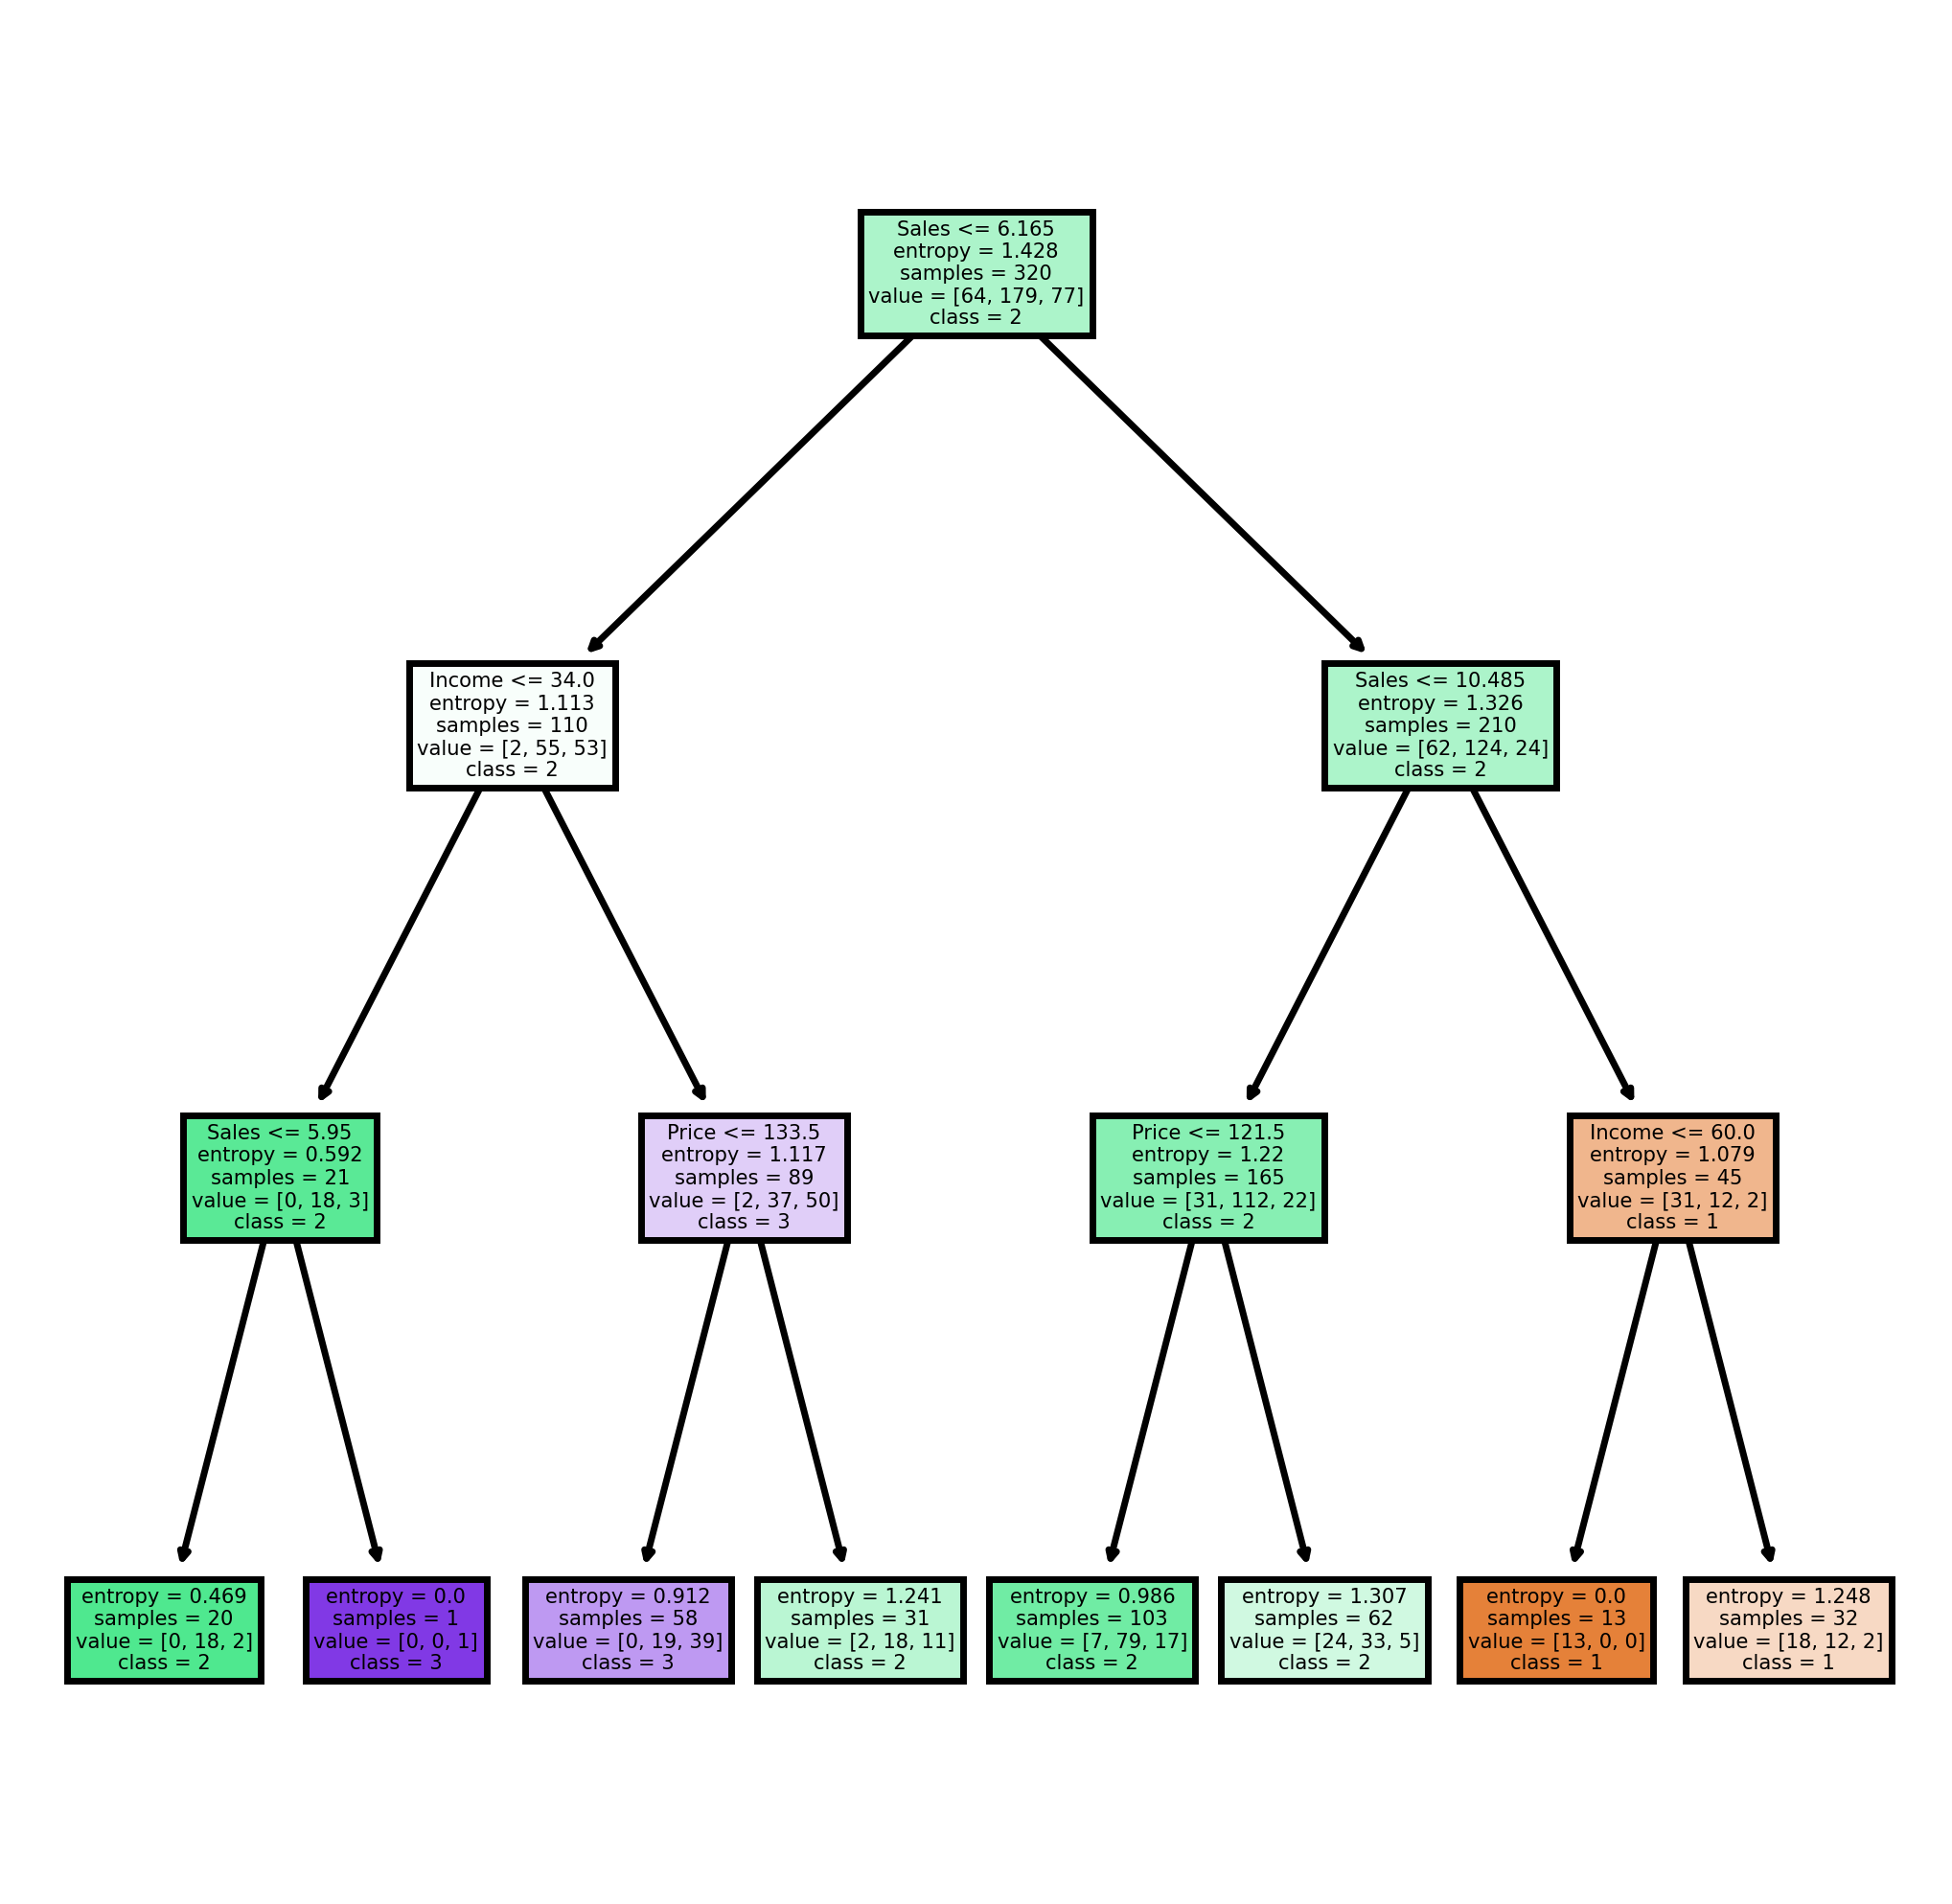

In [19]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [20]:
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_0 <= 6.16
|   |--- feature_2 <= 34.00
|   |   |--- feature_0 <= 5.95
|   |   |   |--- class: 2
|   |   |--- feature_0 >  5.95
|   |   |   |--- class: 3
|   |--- feature_2 >  34.00
|   |   |--- feature_5 <= 133.50
|   |   |   |--- class: 3
|   |   |--- feature_5 >  133.50
|   |   |   |--- class: 2
|--- feature_0 >  6.16
|   |--- feature_0 <= 10.48
|   |   |--- feature_5 <= 121.50
|   |   |   |--- class: 2
|   |   |--- feature_5 >  121.50
|   |   |   |--- class: 2
|   |--- feature_0 >  10.48
|   |   |--- feature_2 <= 60.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  60.00
|   |   |   |--- class: 1



In [21]:
model.feature_importances_

array([0.65629732, 0.        , 0.14363525, 0.        , 0.        ,
       0.20006744])

In [22]:
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Sales          0.656297
Price          0.200067
Income         0.143635
CompPrice      0.000000
Advertising    0.000000
Population     0.000000
dtype: float64

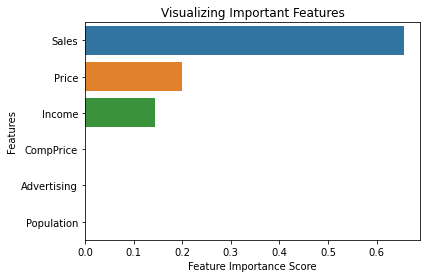

In [23]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [24]:
#Predicting on test data
preds = model.predict(x_test)
pd.Series(preds).value_counts()

2    49
1    17
3    14
dtype: int64

In [25]:
pd.Series(preds)

0     2
1     2
2     2
3     3
4     2
     ..
75    2
76    2
77    2
78    2
79    2
Length: 80, dtype: int64

In [26]:
preds

array([2, 2, 2, 3, 2, 2, 1, 2, 2, 1, 3, 2, 1, 3, 2, 2, 2, 1, 2, 3, 2, 2,
       3, 3, 2, 3, 2, 2, 2, 2, 1, 1, 3, 3, 1, 3, 3, 2, 1, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 3, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [27]:
pd.crosstab(y_test,preds)

col_0,1,2,3
ShelveLoc,,,
1,13,8,0
2,3,27,10
3,1,14,4


In [28]:
np.mean(preds==y_test)

0.55

# Decision Tree Classifier
GINI CRITERIA

In [29]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [30]:
pred = model.predict(x_test)
pred

array([2, 2, 2, 3, 2, 2, 1, 2, 2, 1, 3, 2, 1, 3, 2, 2, 2, 1, 2, 3, 2, 2,
       3, 3, 2, 3, 2, 2, 2, 2, 1, 1, 3, 3, 1, 3, 3, 2, 1, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 3, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [31]:
np.mean(preds == y_test)

0.55

In [32]:
model.feature_importances_

array([0.65629732, 0.        , 0.14363525, 0.        , 0.        ,
       0.20006744])

# Decision tree Regression

In [33]:
from sklearn.tree import DecisionTreeRegressor
array = data.values
X = array[:,0:6]
y = array[:,3] 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [36]:
#accuracy
model.score(X_test,y_test)

0.9967860832302414